## Inactive Subscription data analysis

## Part 1

In [ ]:
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'svg')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st
import math
import seaborn as sns

%matplotlib inline

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]


mpl.rcParams.update(mpl.rcParamsDefault)

# makes plots visible in pycharm
plt.style.use({'figure.facecolor':'white'})

PATH = 'Inactive_subscribers.csv'
df = pd.read_csv(PATH, delimiter=',')

In [ ]:
df.columns.tolist()

['customer created date',
 'recharge customer id',
 'recharge purchase id',
 'item created date',
 'cancellation date',
 'customer first name',
 'customer last name',
 'customer email',
 'customer phone',
 'customer status',
 'past orders count',
 'product title',
 'variant title',
 'quantity',
 'cancel reason',
 'cancel reason comments',
 'still has valid payment method',
 'total number active subscriptions',
 'total number of subscriptions']

In [ ]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions
0,2020-08-12 05:54:17,46969358,51828429,2020-08-12 05:54:21,2020-11-29 18:09:17,Carmen,Galdo Blanco,carmenblancogaldo@gmail.com,0046704012366,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1
1,2019-12-20 17:42:13,35646944,40089650,2019-12-20 17:42:16,2020-11-29 17:37:41,Michele,Kohler,rachael.kohler@comcast.net,971-444-0060,CANCELLED,2,"Annual (ships once every season, auto-renews e...",NaN,1,Other reason,Boxes were great. \r\nThis was a gift.,1,0,1
2,2020-05-31 22:53:29,43028046,47714431,2020-05-31 22:53:34,2020-11-29 14:50:57,Jenai,Drouillard,jenai.drouillard@gmail.com,13133100533,CANCELLED,3,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,I only wanted one box,NaN,1,0,1
3,2020-09-12 17:58:35,48834232,53783969,2020-09-12 17:58:39,2020-11-29 13:25:52,Emely,Flores,flores.emely26@gmail.com,18173193917,CANCELLED,3,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,Other reason,NaN,1,0,1
4,2020-08-31 22:09:00,48220096,53126206,2020-08-31 22:09:04,2020-11-29 12:50:00,Angela,Deibler,angdeib17@gmail.com,2672184226,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   customer created date              3749 non-null   object
 1   recharge customer id               3749 non-null   int64 
 2   recharge purchase id               3749 non-null   int64 
 3   item created date                  3749 non-null   object
 4   cancellation date                  3749 non-null   object
 5   customer first name                3747 non-null   object
 6   customer last name                 3749 non-null   object
 7   customer email                     3749 non-null   object
 8   customer phone                     3724 non-null   object
 9   customer status                    3749 non-null   object
 10  past orders count                  3749 non-null   int64 
 11  product title                      3749 non-null   object
 12  varian

In [ ]:
df.describe()

,recharge customer id,recharge purchase id,past orders count,quantity,still has valid payment method,total number active subscriptions,total number of subscriptions
count,3.749000e+03,3.749000e+03,3749.000000,3749.000000,3749.000000,3749.0,3749.000000
mean,3.684908e+07,4.147018e+07,1.876234,1.006135,0.876500,0.0,1.153908
std,5.235344e+06,5.563242e+06,1.210124,0.096440,0.329054,0.0,0.597530
min,3.141258e+07,3.528443e+07,0.000000,1.000000,0.000000,0.0,1.000000
25%,3.282610e+07,3.712721e+07,1.000000,1.000000,1.000000,0.0,1.000000
50%,3.438552e+07,3.903380e+07,2.000000,1.000000,1.000000,0.0,1.000000
75%,4.089190e+07,4.576944e+07,2.000000,1.000000,1.000000,0.0,1.000000
max,5.413219e+07,5.822727e+07,9.000000,5.000000,1.000000,0.0,10.000000


In [ ]:
df['cancel reason'].value_counts()

Financial reasons                        1029
I only wanted one box                     919
Planning to re-subscribe later            506
Max Number of Charge attempts reached     459
Other reason                              366
Shipping issues                           194
Not worth the price                       137
Box arrived too late                       41
I'm moving                                 37
Other service issues                       34
Upgrade to Annual                          16
other                                       7
Name: cancel reason, dtype: int64

In [ ]:
df['cancel reason'].describe()

count                  3745
unique                   12
top       Financial reasons
freq                   1029
Name: cancel reason, dtype: object

#### total number of subscriptions = active + inactive

In [ ]:
df['total number of subscriptions'].value_counts()

1     3313
2      369
3       53
10      10
4        4
Name: total number of subscriptions, dtype: int64

#### total number of active subscriptions = only active - 1 means active

In [ ]:
df['total number active subscriptions'].value_counts()


0    3749
Name: total number active subscriptions, dtype: int64

In [ ]:
df['past orders count'].value_counts()

1    1836
2    1166
3     398
4     183
5      91
6      38
7      20
9      13
0       4
Name: past orders count, dtype: int64

In [ ]:
df['cancellation date'] = pd.to_datetime(df['cancellation date'].astype(str))
df['customer created date'] = pd.to_datetime(df['customer created date'].astype(str))

In [ ]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions
0,2020-08-12 05:54:17,46969358,51828429,2020-08-12 05:54:21,2020-11-29 18:09:17,Carmen,Galdo Blanco,carmenblancogaldo@gmail.com,0046704012366,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1
1,2019-12-20 17:42:13,35646944,40089650,2019-12-20 17:42:16,2020-11-29 17:37:41,Michele,Kohler,rachael.kohler@comcast.net,971-444-0060,CANCELLED,2,"Annual (ships once every season, auto-renews e...",NaN,1,Other reason,Boxes were great. \r\nThis was a gift.,1,0,1
2,2020-05-31 22:53:29,43028046,47714431,2020-05-31 22:53:34,2020-11-29 14:50:57,Jenai,Drouillard,jenai.drouillard@gmail.com,13133100533,CANCELLED,3,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,I only wanted one box,NaN,1,0,1
3,2020-09-12 17:58:35,48834232,53783969,2020-09-12 17:58:39,2020-11-29 13:25:52,Emely,Flores,flores.emely26@gmail.com,18173193917,CANCELLED,3,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,Other reason,NaN,1,0,1
4,2020-08-31 22:09:00,48220096,53126206,2020-08-31 22:09:04,2020-11-29 12:50:00,Angela,Deibler,angdeib17@gmail.com,2672184226,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1


In [ ]:
df['subscription duration'] = df['cancellation date'] - df['customer created date']
df['subscription duration'].describe()

count                           3749
mean     132 days 21:37:55.937850088
std      113 days 01:11:50.616437626
min                  0 days 00:00:45
25%                 41 days 14:20:09
50%                 93 days 14:17:23
75%                203 days 06:57:50
max                474 days 17:37:57
Name: subscription duration, dtype: object

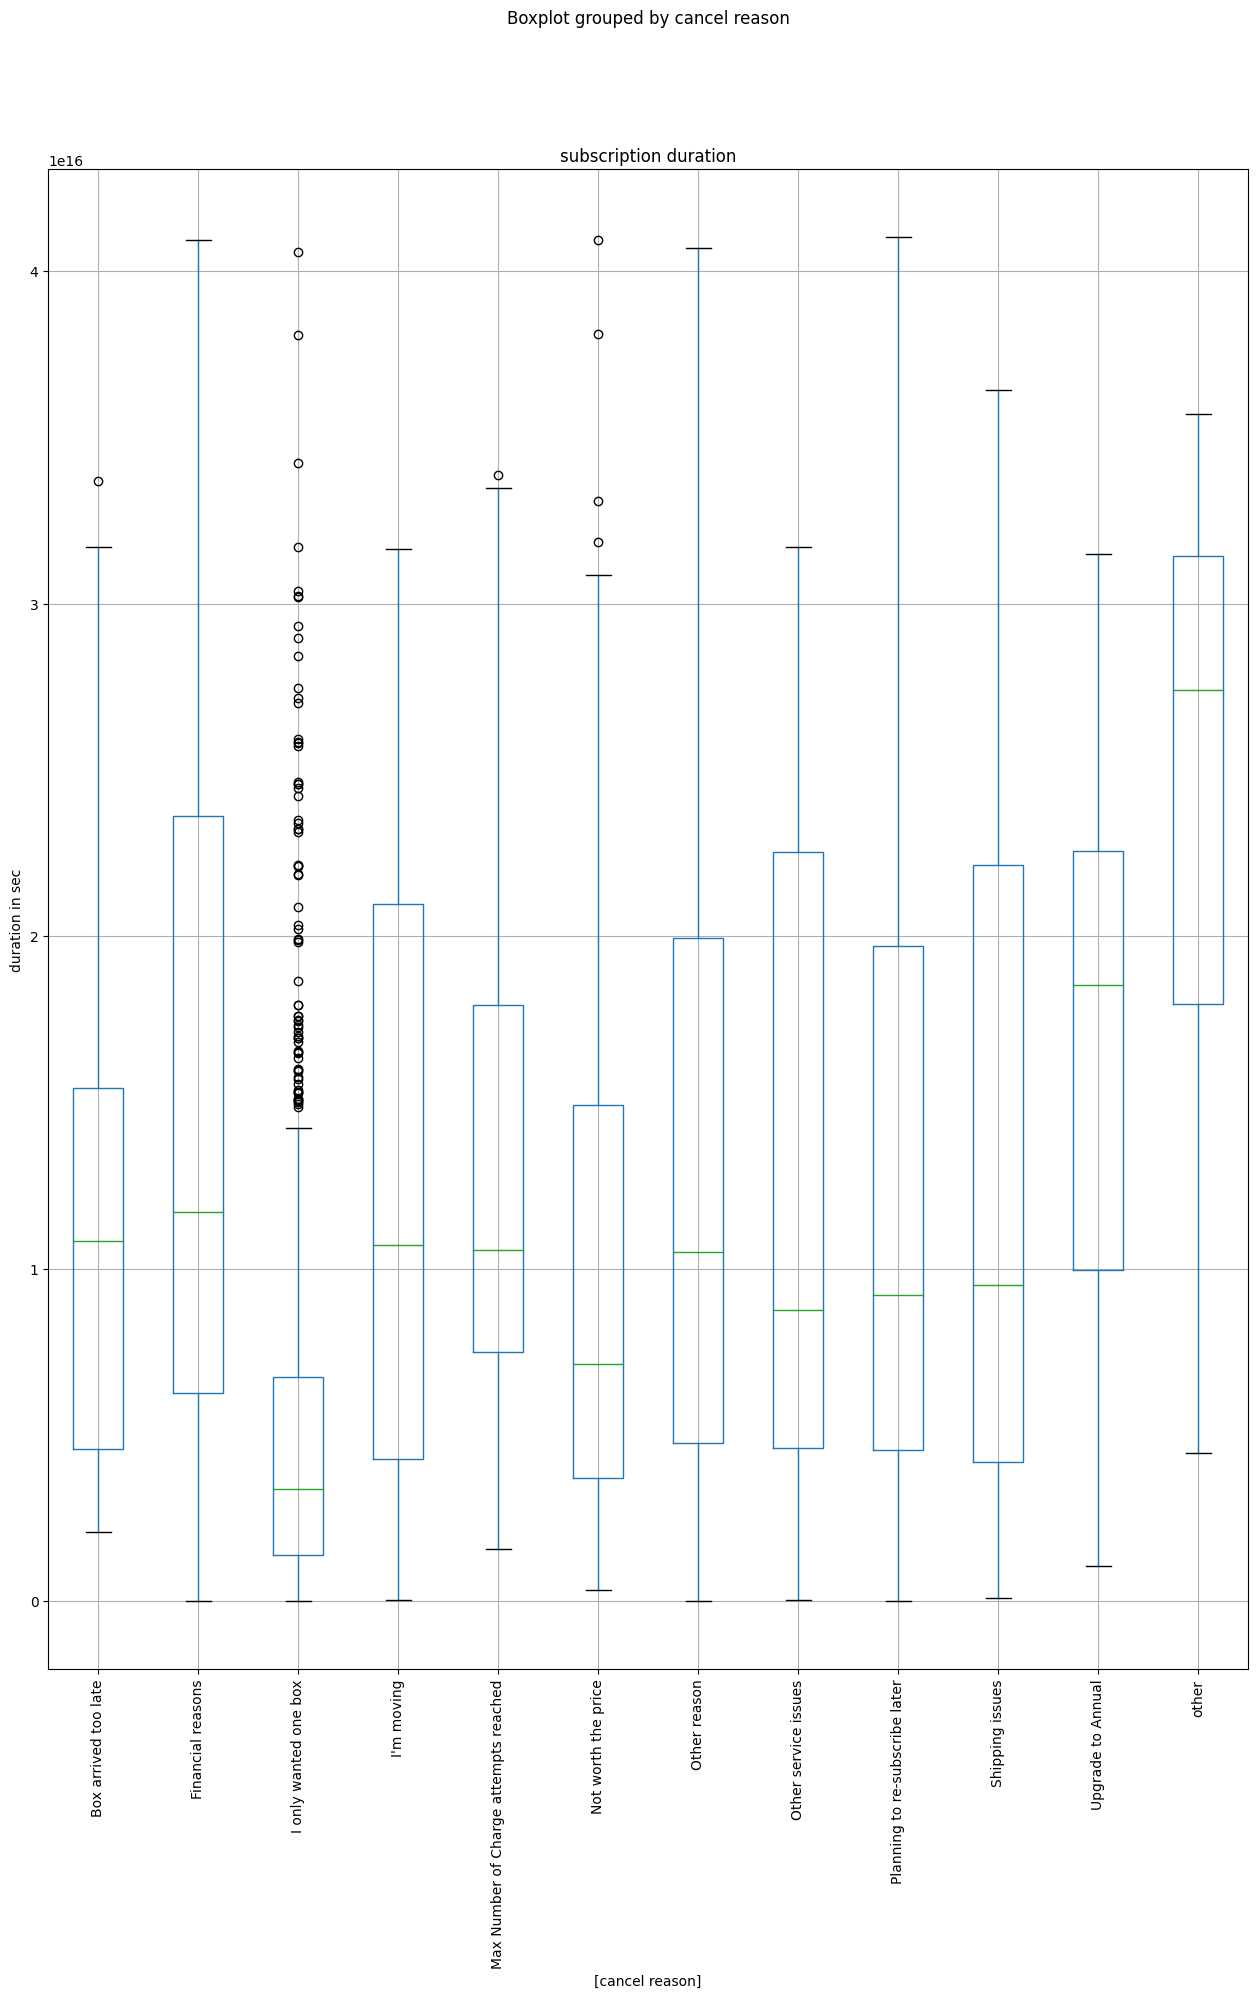

In [ ]:
plt.rcParams["figure.figsize"] = [15, 20]
df.boxplot(column=['subscription duration'], by=['cancel reason'])
plt.xticks(rotation=90)
plt.ylabel("duration in sec")
plt.savefig('bar1.png', bbox_inches='tight')
plt.show()

In [ ]:
df['cancel reason'].value_counts()

Financial reasons                        1029
I only wanted one box                     919
Planning to re-subscribe later            506
Max Number of Charge attempts reached     459
Other reason                              366
Shipping issues                           194
Not worth the price                       137
Box arrived too late                       41
I'm moving                                 37
Other service issues                       34
Upgrade to Annual                          16
other                                       7
Name: cancel reason, dtype: int64

In [ ]:
df_without = df['subscription duration']

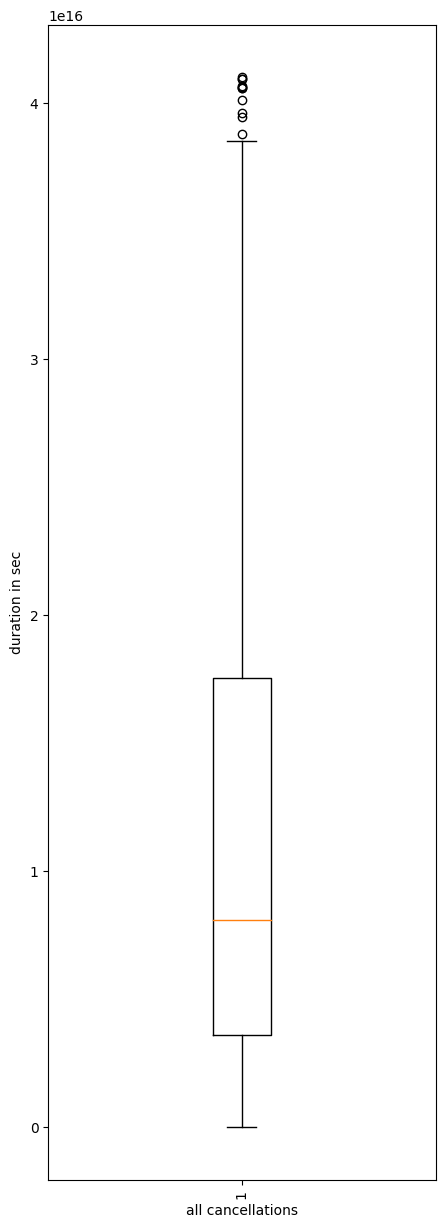

In [ ]:
plt.rcParams["figure.figsize"] = [5, 15]
plt.boxplot(df_without)
plt.xticks(rotation=90)
plt.xlabel("all cancellations")
plt.ylabel("duration in sec")
plt.yticks()
plt.savefig('bar2.png', bbox_inches='tight')
plt.show()


In [ ]:
df['subscription duration']

0      109 days 12:15:00
1      344 days 23:55:28
2      181 days 15:57:28
3       77 days 19:27:17
4       89 days 14:41:00
              ...       
3744     0 days 00:28:36
3745     0 days 00:16:37
3746     0 days 00:19:58
3747     0 days 00:12:40
3748     0 days 00:02:34
Name: subscription duration, Length: 3749, dtype: timedelta64[ns]

In [ ]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
0,2020-08-12 05:54:17,46969358,51828429,2020-08-12 05:54:21,2020-11-29 18:09:17,Carmen,Galdo Blanco,carmenblancogaldo@gmail.com,0046704012366,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1,109 days 12:15:00
1,2019-12-20 17:42:13,35646944,40089650,2019-12-20 17:42:16,2020-11-29 17:37:41,Michele,Kohler,rachael.kohler@comcast.net,971-444-0060,CANCELLED,2,"Annual (ships once every season, auto-renews e...",NaN,1,Other reason,Boxes were great. \r\nThis was a gift.,1,0,1,344 days 23:55:28
2,2020-05-31 22:53:29,43028046,47714431,2020-05-31 22:53:34,2020-11-29 14:50:57,Jenai,Drouillard,jenai.drouillard@gmail.com,13133100533,CANCELLED,3,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,I only wanted one box,NaN,1,0,1,181 days 15:57:28
3,2020-09-12 17:58:35,48834232,53783969,2020-09-12 17:58:39,2020-11-29 13:25:52,Emely,Flores,flores.emely26@gmail.com,18173193917,CANCELLED,3,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,Other reason,NaN,1,0,1,77 days 19:27:17
4,2020-08-31 22:09:00,48220096,53126206,2020-08-31 22:09:04,2020-11-29 12:50:00,Angela,Deibler,angdeib17@gmail.com,2672184226,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1,89 days 14:41:00


In [ ]:
subs_duration = df['subscription duration']

In [ ]:
type(subs_duration)

pandas.core.series.Series

In [ ]:
subs_duration.head()

0   109 days 12:15:00
1   344 days 23:55:28
2   181 days 15:57:28
3    77 days 19:27:17
4    89 days 14:41:00
Name: subscription duration, dtype: timedelta64[ns]

In [ ]:
subs_duration.dtypes

dtype('<m8[ns]')

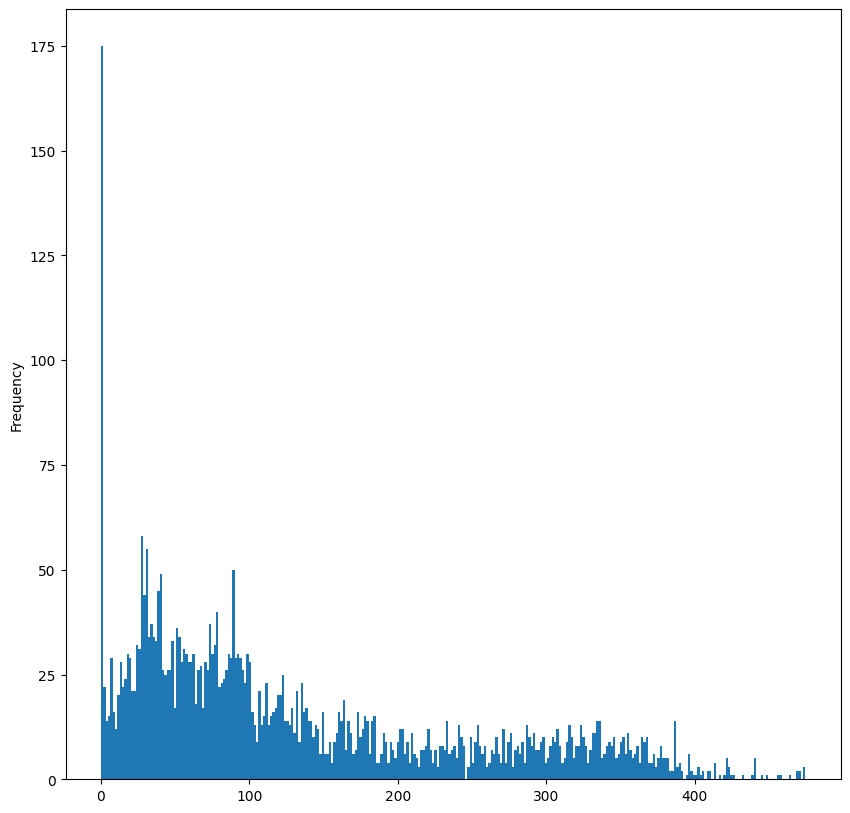

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
subs_duration = subs_duration / np.timedelta64(1, 'D')
subs_duration.plot.hist(bins=300)
plt.show()

# plt.savefig('hist.png', bbox_inches='tight')
# df['subscription duration'].describe()

In [ ]:
subs_duration.head()

0    109.510417
1    344.996852
2    181.664907
3     77.810613
4     89.611806
Name: subscription duration, dtype: float64

In [ ]:
# np.seterr(divide='ignore', invalid='ignore')
# best_dist, best_p, params = get_best_distribution(df_subs_duration.astype('timedelta64[s]'))
best_dist_s, best_p_s, params_s = get_best_distribution(subs_duration)

p value for norm = 3.4046985494527053e-71
p value for exponweib = 1.4876193005706686e-13
p value for weibull_max = 0.0
p value for weibull_min = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 2.0569462642604463e-31
p value for genextreme = 1.4039969631902824e-12
Best fitting distribution: genextreme
Best p value: 1.4039969631902824e-12
Parameters for the best fit: (-0.34333223531657653, 68.61915935867106, 67.13224406885611)


Mean: 1.0843620529656892
Variance: 8.270333380773552
Skew: nan
Kurtosis: nan


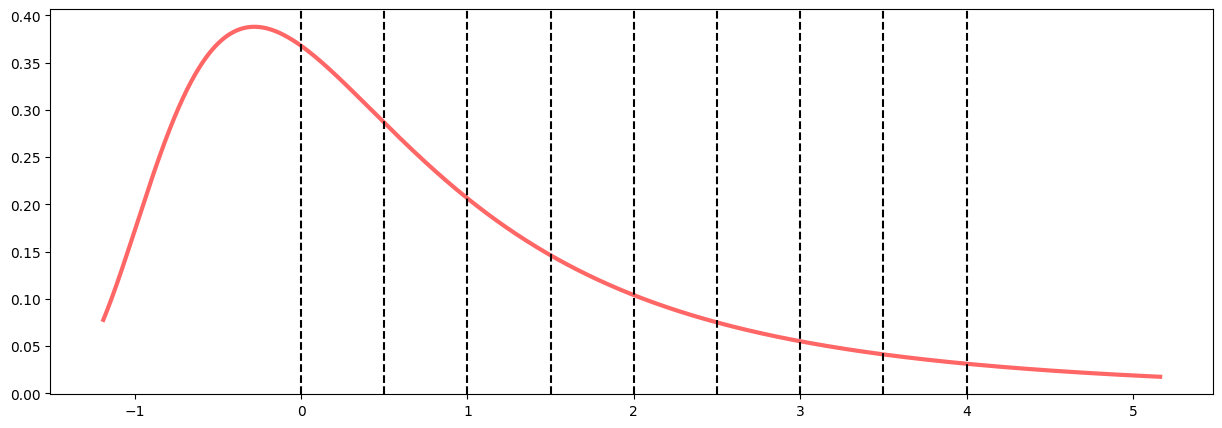

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax = plt.subplots(1, 1)

c = params_s[0]
# loc = params_s[2]
# scale = params_s[1]
mean, var, skew, kurt = st.genextreme.stats(c, moments='mvsk')

print("Mean: " + str(mean))
print("Variance: " + str(var))
print("Skew: " + str(skew))
print("Kurtosis: " + str(kurt))

x = np.linspace(st.genextreme.ppf(0.01, c), st.genextreme.ppf(0.95, c), 3600)

# standardized form
ax.plot(x, st.genextreme.pdf(x, c), 'r-', lw=3, alpha=0.6, label='genex pdf')

x_position = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
for xc in x_position:
    plt.axvline(x=xc, color='k', linestyle='--')

# real form
# ax.plot(x, st.genextreme.pdf(x, c, loc, scale), 'r-', lw=3, alpha=0.6, label='genex pdf')

plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

After 0 days: 0.37
After 0.5 days: 0.29
After 1 days: 0.21
After 1.5 days: 0.15
After 2 days: 0.1
After 2.5 days: 0.08
After 3 days: 0.06
After 3.5 days: 0.04
After 4 days: 0.03


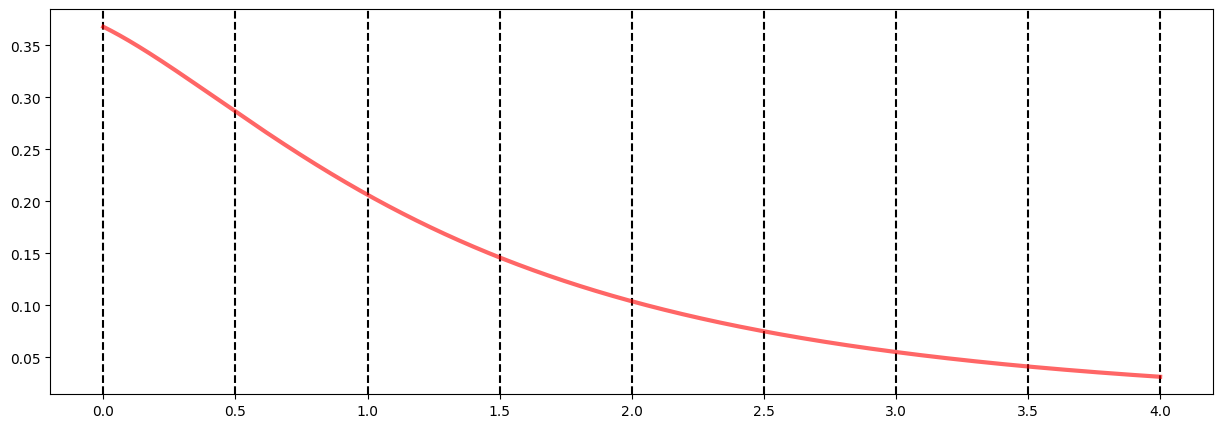

In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 4, 3600)

x_position = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
for xc in x_position:
    plt.axvline(x=xc, color='k', linestyle='--')

ax.plot(x, st.genextreme.pdf(x, c), 'r-', lw=3, alpha=0.6, label='genex pdf')

for x in x_position:
    print("After {} days: {}".format(x, round(st.genextreme.pdf(x, c), 2)))

plt.show()

In [ ]:
df['product title'].value_counts()

Seasonal (ships once every season, auto-renews every season)                   1847
Daebak Box - Seasonal Plan (auto-renews, cancel anytime)                        682
Annual (ships once every season, auto-renews every year)                        587
Deluxe - Month to Month (auto-renews, cancel anytime, ships once a month)       304
Daebak Jewelry Collection - Seasonal Plan (auto-renews, cancel anytime)          95
Original - Month to Month (auto-renews, cancel anytime, ships once a month)      75
Deluxe - 3 Month Prepay (auto-renews, cancel anytime, ships once a month)        47
Daebak Box - Annual Plan (auto-renews, cancel anytime)                           42
Seasonal Auto renew                                                              31
Daebak Jewelry Collection - Annual Plan (auto-renews, cancel anytime)            20
Original - 3 Month Prepay (auto-renews, cancel anytime, ships once a month)       6
Deluxe - 12 Month Prepay (auto-renews, cancel anytime, ships once a month)  

In [ ]:
# density plot
df_duration_and_type = df[['subscription duration','product title']]
df_duration_and_type.head()

,subscription duration,product title
0,109 days 12:15:00,"Daebak Box - Seasonal Plan (auto-renews, cance..."
1,344 days 23:55:28,"Annual (ships once every season, auto-renews e..."
2,181 days 15:57:28,"Daebak Box - Seasonal Plan (auto-renews, cance..."
3,77 days 19:27:17,"Deluxe - Month to Month (auto-renews, cancel a..."
4,89 days 14:41:00,"Daebak Box - Seasonal Plan (auto-renews, cance..."


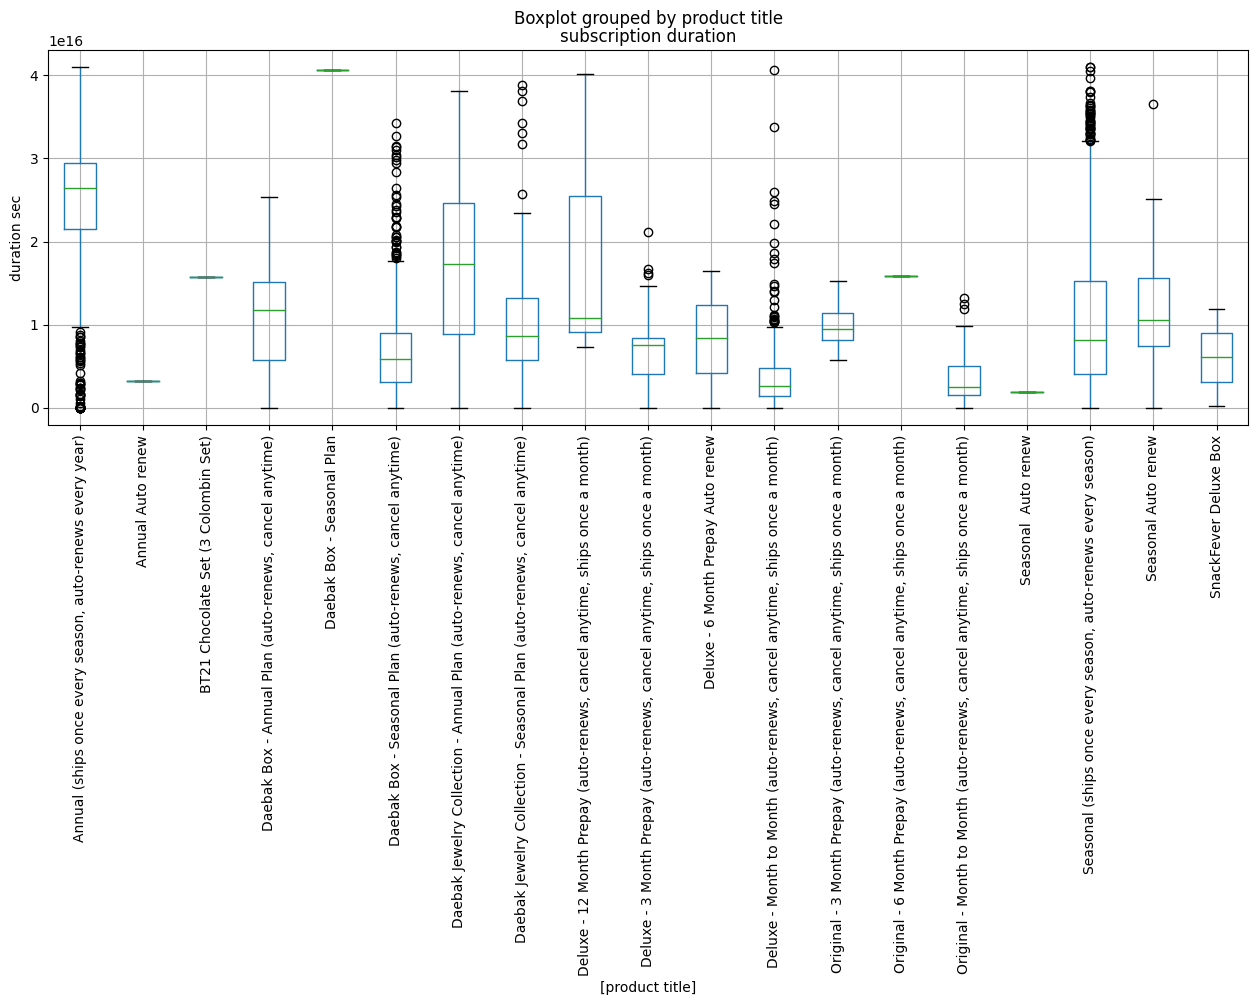

In [ ]:
# take sub type and sub duration
df_duration_and_type.boxplot(column=['subscription duration'], by=['product title'])
plt.rcParams["figure.figsize"] = [30, 30]
plt.xticks(rotation=90)
plt.ylabel("duration sec")
plt.savefig('bar3.png', bbox_inches='tight')
plt.show()

In [ ]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
0,2020-08-12 05:54:17,46969358,51828429,2020-08-12 05:54:21,2020-11-29 18:09:17,Carmen,Galdo Blanco,carmenblancogaldo@gmail.com,0046704012366,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1,109 days 12:15:00
1,2019-12-20 17:42:13,35646944,40089650,2019-12-20 17:42:16,2020-11-29 17:37:41,Michele,Kohler,rachael.kohler@comcast.net,971-444-0060,CANCELLED,2,"Annual (ships once every season, auto-renews e...",NaN,1,Other reason,Boxes were great. \r\nThis was a gift.,1,0,1,344 days 23:55:28
2,2020-05-31 22:53:29,43028046,47714431,2020-05-31 22:53:34,2020-11-29 14:50:57,Jenai,Drouillard,jenai.drouillard@gmail.com,13133100533,CANCELLED,3,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,I only wanted one box,NaN,1,0,1,181 days 15:57:28
3,2020-09-12 17:58:35,48834232,53783969,2020-09-12 17:58:39,2020-11-29 13:25:52,Emely,Flores,flores.emely26@gmail.com,18173193917,CANCELLED,3,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,Other reason,NaN,1,0,1,77 days 19:27:17
4,2020-08-31 22:09:00,48220096,53126206,2020-08-31 22:09:04,2020-11-29 12:50:00,Angela,Deibler,angdeib17@gmail.com,2672184226,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1,89 days 14:41:00


In [ ]:
df['subscription duration'] = subs_duration
corr_matrix = df.corr()
corr_matrix.head()

,recharge customer id,recharge purchase id,past orders count,quantity,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
recharge customer id,1.000000,0.965880,-0.135169,-0.017171,0.103698,NaN,-0.059769,-0.438171
recharge purchase id,0.965880,1.000000,-0.050771,-0.015983,0.099897,NaN,0.063045,-0.378277
past orders count,-0.135169,-0.050771,1.000000,-0.000351,0.088912,NaN,0.535183,0.389553
quantity,-0.017171,-0.015983,-0.000351,1.000000,0.007067,NaN,-0.007130,-0.014247
still has valid payment method,0.103698,0.099897,0.088912,0.007067,1.000000,NaN,0.009851,-0.088128


In [ ]:
corr_matrix["subscription duration"].sort_values(ascending=False)

subscription duration                1.000000
past orders count                    0.389553
total number of subscriptions        0.072026
quantity                            -0.014247
still has valid payment method      -0.088128
recharge purchase id                -0.378277
recharge customer id                -0.438171
total number active subscriptions         NaN
Name: subscription duration, dtype: float64

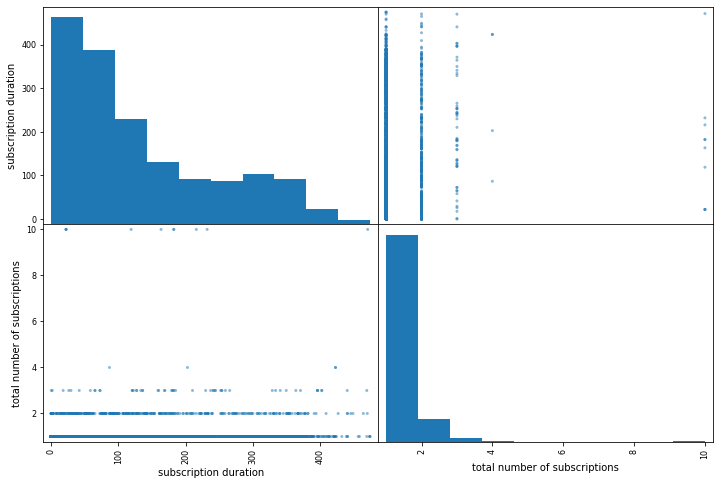

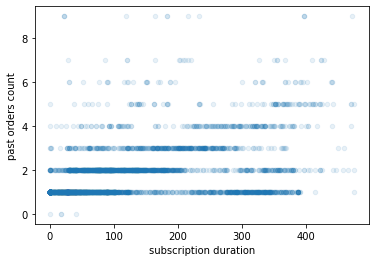

In [ ]:
from pandas.plotting import scatter_matrix
%matplotlib inline
attributes = ["subscription duration", "total number of subscriptions"]
scatter_matrix(df[attributes], figsize=(12, 8))
df.plot(kind='scatter', x='subscription duration', y='past orders count', alpha=0.1)



#### Taking out 2 main reasons for unsubbing




In [ ]:
PATH = 'Inactive_subscribers.csv'
df = pd.read_csv(PATH, delimiter=',')

In [ ]:
df['cancellation date'] = pd.to_datetime(df['cancellation date'].astype(str))
df['customer created date'] = pd.to_datetime(df['customer created date'].astype(str))

In [ ]:
df['subscription duration'] = df['cancellation date'] - df['customer created date']

In [ ]:
df = df[(df['cancel reason']!='Max Number of Charge attempts reached')
                & (df['cancel reason']!='Financial reasons')]

In [ ]:
df.describe()

,recharge customer id,recharge purchase id,past orders count,quantity,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
count,2.261000e+03,2.261000e+03,2261.000000,2261.000000,2261.000000,2261.0,2261.000000,2261
mean,3.725159e+07,4.190431e+07,1.845644,1.005307,0.997346,0.0,1.175144,110 days 23:59:18.909774444
std,5.395523e+06,5.733815e+06,1.235022,0.102914,0.051457,0.0,0.706056,107 days 16:01:24.040408686
min,3.141258e+07,3.528443e+07,0.000000,1.000000,0.000000,0.0,1.000000,0 days 00:00:45
25%,3.293854e+07,3.730074e+07,1.000000,1.000000,1.000000,0.0,1.000000,30 days 12:19:25
50%,3.475194e+07,3.931190e+07,1.000000,1.000000,1.000000,0.0,1.000000,72 days 01:38:10
75%,4.141900e+07,4.653578e+07,2.000000,1.000000,1.000000,0.0,1.000000,162 days 22:11:18
max,5.413219e+07,5.822727e+07,9.000000,5.000000,1.000000,0.0,10.000000,474 days 17:37:57


In [ ]:
df['cancel reason'].count()

2257

In [ ]:
df['cancel reason'].value_counts()

I only wanted one box             919
Planning to re-subscribe later    506
Other reason                      366
Shipping issues                   194
Not worth the price               137
Box arrived too late               41
I'm moving                         37
Other service issues               34
Upgrade to Annual                  16
other                               7
Name: cancel reason, dtype: int64

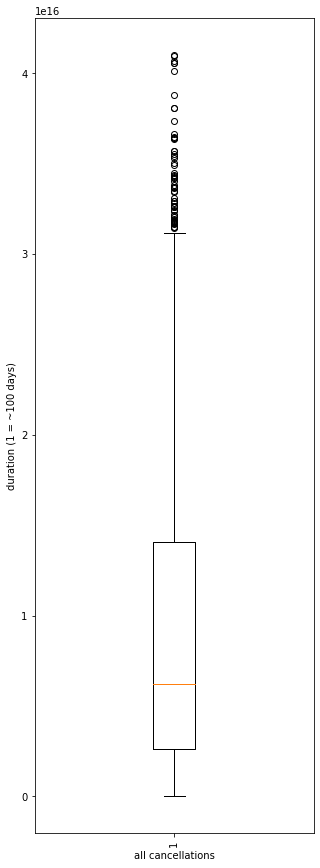

In [ ]:
df_without = df['subscription duration']
plt.rcParams["figure.figsize"] = [5, 15]
plt.boxplot(df_without)
plt.xticks(rotation=90)
plt.xlabel("all cancellations")
plt.ylabel("duration (1 = ~100 days)")
plt.yticks()
plt.savefig('bar1_without.png', bbox_inches='tight')
plt.show()

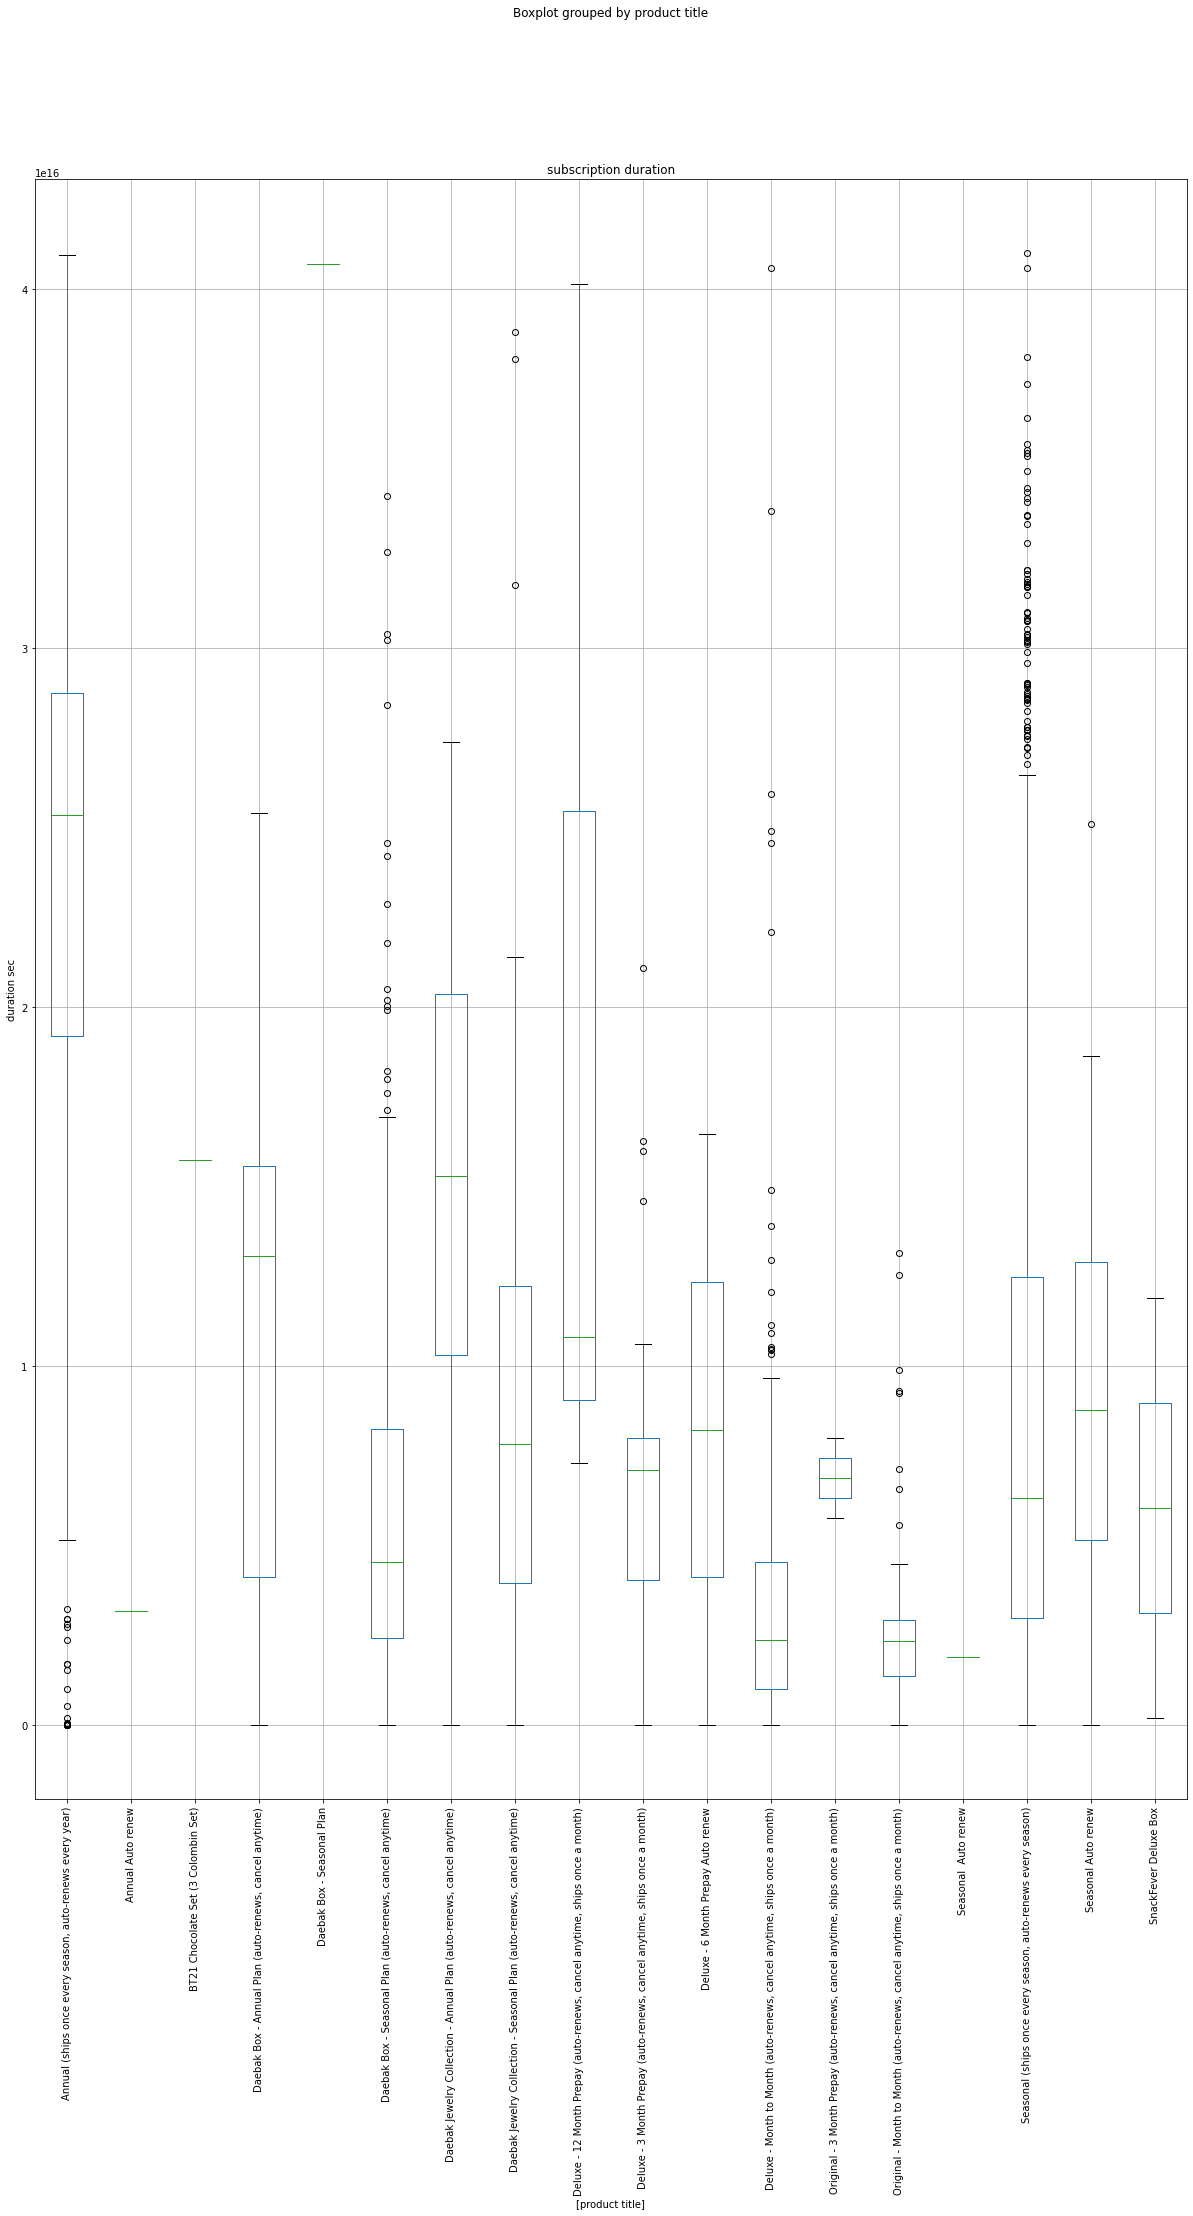

In [ ]:
# take sub type and sub duration
df_duration_and_type = df[['subscription duration','product title']]
plt.rcParams["figure.figsize"] = [20, 30]
df_duration_and_type.boxplot(column=['subscription duration'], by=['product title'])
plt.xticks(rotation=90)
plt.ylabel("duration sec")
plt.savefig('bar3_without.png', bbox_inches='tight')
plt.show()

In [ ]:
subs_duration = df_without

0    109.510417
1    344.996852
2    181.664907
3     77.810613
4     89.611806
Name: subscription duration, dtype: float64

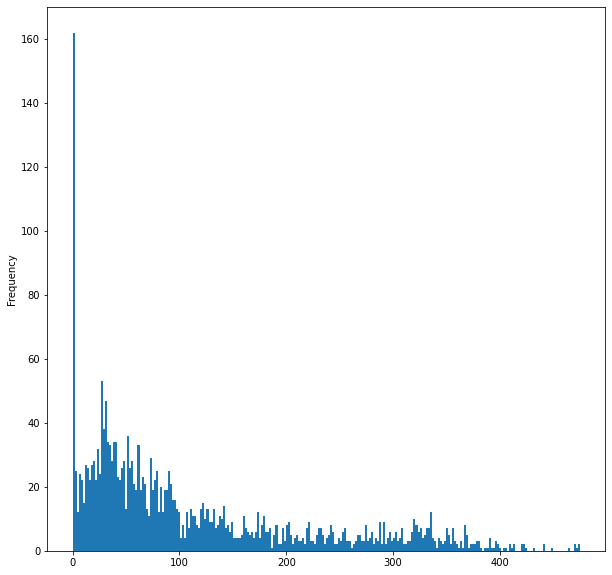

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
subs_duration = subs_duration/np.timedelta64(1, 'D')
subs_duration.plot.hist(bins=250)

subs_duration.head()

# plt.savefig('hist.png', bbox_inches='tight')
# df['subscription duration'].describe()

In [ ]:
# np.seterr(divide='ignore', invalid='ignore')
# best_dist, best_p, params = get_best_distribution(df_subs_duration.astype('timedelta64[s]'))
best_dist_s, best_p_s, params_s = get_best_distribution(subs_duration)

p value for norm = 1.9335646010318783e-55
p value for exponweib = 2.0393277151927146e-83
p value for weibull_max = 0.0
p value for weibull_min = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 6.848279544943549e-09
p value for genextreme = 3.87936900336973e-05
Best fitting distribution: genextreme
Best p value: 3.87936900336973e-05
Parameters for the best fit: (-0.5073078101511249, 47.997038599529915, 52.4869786766899)


Mean: 1.5736185816971944
Variance: nan
Skew: nan
Kurtosis: nan


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2594: RuntimeWarning: invalid value encountered in power
  np.sign(c)*(-g3 + (g2 + 2*g2mg12)*g1)/g2mg12**1.5,


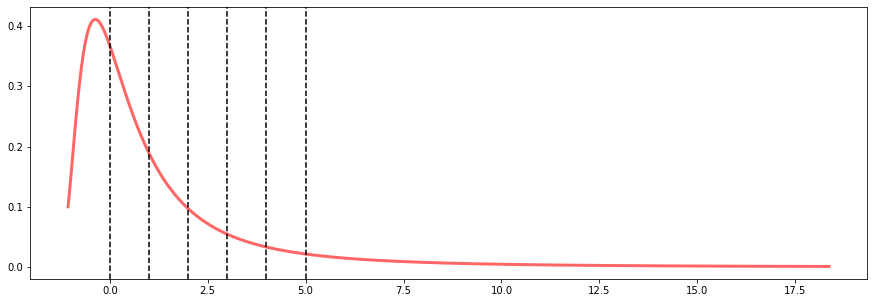

In [ ]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax = plt.subplots(1, 1)

c = params_s[0]
# loc = params_s[1]
# scale = params_s[2]
mean, var, skew, kurt = st.genextreme.stats(c, moments='mvsk')

print("Mean: " + str(mean))
print("Variance: " + str(var))
print("Skew: " + str(skew))
print("Kurtosis: " + str(kurt))

x = np.linspace(st.genextreme.ppf(0.01, c), st.genextreme.ppf(0.99, c), 400)

# standardized form
ax.plot(x, st.genextreme.pdf(x, c), 'r-', lw=3, alpha=0.6, label='genex pdf')

x_position = [0, 1, 2, 3, 4, 5]
for xc in x_position:
    plt.axvline(x=xc, color='k', linestyle='--')

# real form
# ax.plot(x, st.genextreme.pdf(x, c, loc, scale), 'r-', lw=3, alpha=0.6, label='genex pdf')

plt.show()

# part 2

  comparison_group time_period  total_active_subscribers
0          current  2020-01-01                      2683
1          current  2020-01-02                      2687
2          current  2020-01-03                      2686
3          current  2020-01-04                      2695
4          current  2020-01-05                      2697
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   comparison_group          628 non-null    object
 1   time_period               628 non-null    object
 2   total_active_subscribers  628 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.8+ KB
None


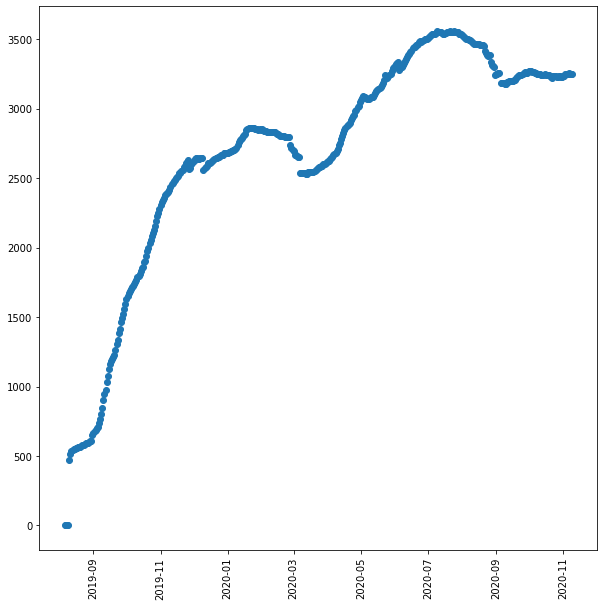

comparison_group            462
time_period                 462
total_active_subscribers    462
dtype: int64

In [ ]:
PATH = 'dataset.csv'
df = pd.read_csv(PATH)

# quick summary
print(df.head())
print(df.info())

# index and sorting
df = df.sort_values(by='time_period', ascending=True)
df = df[df['total_active_subscribers'] > 0]
df = df.set_index(df['time_period'])
df['time_period'] = pd.to_datetime(df['time_period'])

df.describe()

plt.rcParams["figure.figsize"] = [10, 10]
plt.scatter(x=df['time_period'], y=df['total_active_subscribers'])
plt.plot()
plt.xticks(rotation=90)
plt.savefig('bar4.png', bbox_inches='tight')
plt.show()

df.count()

In [ ]:
df.info

<bound method DataFrame.info of             comparison_group time_period  total_active_subscribers
time_period                                                       
2019-08-06          previous  2019-08-06                         1
2019-08-07          previous  2019-08-07                         1
2019-08-08          previous  2019-08-08                         4
2019-08-09          previous  2019-08-09                         5
2019-08-10          previous  2019-08-10                       473
...                      ...         ...                       ...
2020-11-05           current  2020-11-05                      3250
2020-11-06           current  2020-11-06                      3255
2020-11-07           current  2020-11-07                      3250
2020-11-08           current  2020-11-08                      3248
2020-11-09           current  2020-11-09                      3251

[462 rows x 3 columns]>

In [ ]:
df.head()

,comparison_group,time_period,total_active_subscribers
time_period,,,
2019-08-06,previous,2019-08-06,1
2019-08-07,previous,2019-08-07,1
2019-08-08,previous,2019-08-08,4
2019-08-09,previous,2019-08-09,5
2019-08-10,previous,2019-08-10,473


In [ ]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('inactive_subs.ipynb')